In [23]:
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [24]:
# Read dataset
processed_data = os.path.abspath('../datasets/processed_data.csv')

# Merging two csv files
data = pd.read_csv(processed_data)

data.head()

,Location,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,0,2023,2,26,18,48,24.0,47.0,17.0,210.0,13.0,14.0,a_Good
1,7,2023,2,22,20,36,18.0,28.0,8.0,346.0,27.0,7.0,a_Good
2,0,2023,2,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
3,0,2023,2,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
4,0,2023,2,27,18,47,24.0,46.0,19.0,216.0,8.0,14.0,a_Good


In [25]:
# Selecting features and target variable
X = data[['Location', 'Year', 'Month', 'Day', 'Hour', 'PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']]
y = data['AQI']

# Data scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = np.array(y).reshape(-1, 1)
y = scaler.fit_transform(y)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Building a DNN model for regression
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model.summary()

/Users/macbook/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,289 (173.00 KB)

 Trainable params: 44,289 (173.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Model compilation
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [28]:
# Model training
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0342 - mean_absolute_error: 0.1269 - val_loss: 0.0054 - val_mean_absolute_error: 0.0529
Epoch 2/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0068 - mean_absolute_error: 0.0593 - val_loss: 0.0021 - val_mean_absolute_error: 0.0364
Epoch 3/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - mean_absolute_error: 0.0463 - val_loss: 0.0013 - val_mean_absolute_error: 0.0273
Epoch 4/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - mean_absolute_error: 0.0366 - val_loss: 9.8829e-04 - val_mean_absolute_error: 0.0244
Epoch 5/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - mean_absolute_error: 0.0333 - val_loss: 0.0016 - val_mean_absolute_error: 0.0303
Epoch 6/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - mean_absolute_error: 0.0305 - val_loss: 9.4541e-04 - val_mean_absolute_error: 0.0244
Epoch 7/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - mean_absolute_error: 0.

In [29]:
# Model evaluation
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")

Test MAE: 0.01


In [30]:
# Prognostication
y_pred = model.predict(X_test).flatten()

# Scaling predictions and test values ​​back to the original scale
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step


In [31]:
# Metrics evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 14.31
RMSE: 3.78
MAE: 2.37
R2 Score: 1.00


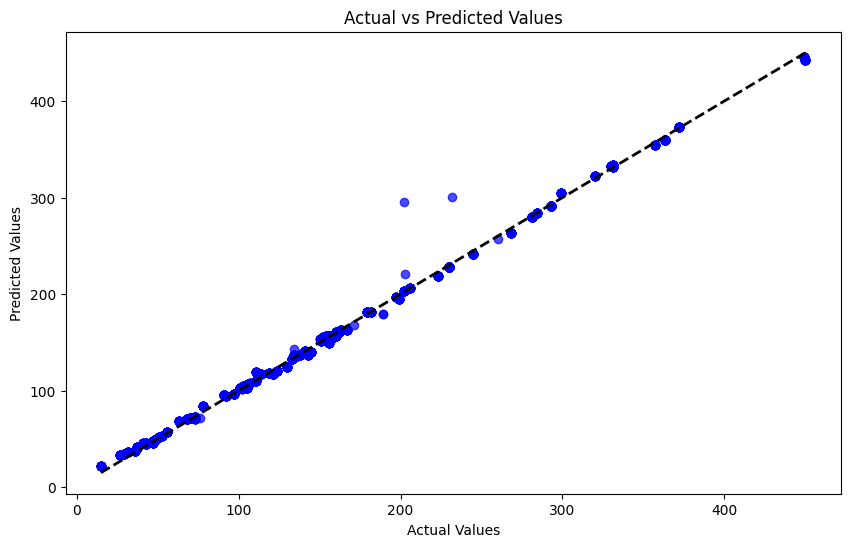

In [32]:
# Visualization of results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [33]:
# Saving the model
model.save("serialized/keras/dnnModel.keras")